##### 변수설명
PassengerId : 각 승객의 고유 번호

Survived : 생존 여부(종속 변수)
+ 0 = 사망
+ 1 = 생존

Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
+ 1st = Upper
+ 2nd = Middle
+ 3rd = Lower

Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항
+ C = Cherbourg
+ Q = Queenstown
+ S = Southampton

In [2]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('f:/data/titanic/train.csv')
test = pd.read_csv('f:/data/titanic/test.csv')

In [14]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
passengerId = test.PassengerId
passengerId

y=train.Survived

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
survival = train.Survived.sum()
n_survival = train.shape[0] - survival

In [11]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
train.Pclass.count()

891

In [12]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [34]:
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')

In [35]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [31]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 
                                        'Officer')
train['Title'] = train['Title'].replace(['Jonkheer','Master'], 'Master')
train['Title'] = train['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady',
                                        'Dona', 'Royalty'])
train['Title'] = train['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train['Title'] = train['Title'].replace(['Mlle', 'Miss'], 'Miss')
train['Title'] = train['Title'].replace(['Mr'], 'Mr')

In [36]:
test['Title'] = test['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 
                                        'Officer')
test['Title'] = test['Title'].replace(['Jonkheer','Master'], 'Master')
test['Title'] = test['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady',
                                        'Dona', 'Royalty'])
test['Title'] = test['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
test['Title'] = test['Title'].replace(['Mlle', 'Miss'], 'Miss')
test['Title'] = test['Title'].replace(['Mr'], 'Mr')

In [38]:
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(test.Age.median())

In [39]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names)
train['AgeGroup'].value_counts()

YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

In [40]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
test['AgeGroup'] = pd.cut(test['Age'], bins=bin, labels=group_names)
test['AgeGroup'].value_counts()

YoungAdult    171
MiddleAged     94
Youth          88
Baby           54
Senior         11
Name: AgeGroup, dtype: int64

<AxesSubplot:>

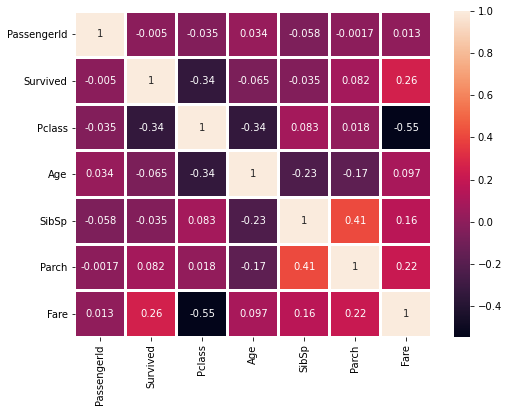

In [41]:
plt.subplots(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, linewidths=2)

In [43]:
train[['SibSp', 'Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0
